In [4]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import timeit
import h5py
from pathlib import Path
import numpy as np
from itertools import product
import pickle
import scipy.special
import scipy.stats
from math import exp
import multiprocessing
import functools

from montecarlo import *

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))

from montecarlo import *

In [145]:
def exponential_tuner(mcmc_func, mcmc_kwargs):
    N_tuning_steps = mcmc_kwargs['N_tuning_steps']
    tuning_kwargs = mcmc_kwargs.copy()
    tuning_kwargs.update(N_steps = N_tuning_steps, N_burn_in = 0)
    
    tuning_kwargs.update(proposal = p_uniform_proposal)
    log = mcmc_func(**tuning_kwargs)
    min_p_acc = log.accept_rates.sum()/log.proposal_rates.sum()
    
    print('Tuning')
    print(f'min p_acc = {min_p_acc}')
    if min_p_acc > 0.2: return p_uniform_proposal
    
    scale = 0.5
    tuning_kwargs.update(proposal = p_multi_site_variable_reflect_exponential(scale = scale))
    
    for i in range(10):
        log = mcmc_func(**tuning_kwargs)
        p_acc = log.accept_rates.sum()/log.proposal_rates.sum()
        print(f'scale = {scale}, p_acc = {p_acc}')
        
        if p_acc > 0.5: scale = scale * 2
        elif p_acc < 0.2: scale = scale / 2
        else: return p_multi_site_variable_reflect_exponential(scale = scale)
        
        tuning_kwargs.update(state = log.last_state,
                           proposal = p_multi_site_variable_reflect_exponential(scale = scale))
def tuner(mcmc_func):
    def wrapped_mcmc_func(**kwargs):
        proposal = exponential_tuner(mcmc_func, kwargs)
        new_kwargs = kwargs.copy()
        new_kwargs.update(proposal = proposal)
        return mcmc_func(**new_kwargs)
    return wrapped_mcmc_func

mcmc_func = tuner(FK_mcmc_2)
mcmc_kwargs = dict(
    state = np.arange(N_sites)%2,
    #accept_function = perturbation_accept,
    accept_function = simple_accept,
    parameters = dict(mu=0, beta=1/0.2, alpha=1.5, J=1, U=1, t=1, normalise = True),            
    logger = DataLogger(),
    N_tuning_steps = 500,
    N_steps = 100, N_burn_in = 0,
    )

mcmc_func(**mcmc_kwargs)     

Warning, p_acc = 0.0, {'mu': 0, 'beta': 5.0, 'alpha': 1.5, 'J': 1, 'U': 1, 't': 1, 'normalise': True, 'J_matrix': 'suppressed for brevity'}
Tuning
min p_acc = 0.0
Warning, p_acc = 0.8693, {'mu': 0, 'beta': 5.0, 'alpha': 1.5, 'J': 1, 'U': 1, 't': 1, 'normalise': True, 'J_matrix': 'suppressed for brevity'}
scale = 0.5, p_acc = 0.8693
Warning, p_acc = 0.65, {'mu': 0, 'beta': 5.0, 'alpha': 1.5, 'J': 1, 'U': 1, 't': 1, 'normalise': True, 'J_matrix': 'suppressed for brevity'}
scale = 1.0, p_acc = 0.65
scale = 2.0, p_acc = 0.4274


0.32683168316831684


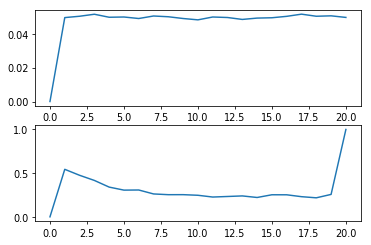

In [18]:
from montecarlo import *
N_sites = 20

log = FK_mcmc_2(
    state = np.arange(N_sites)%2,
    #proposal = p_multi_site_variable_reflect_poisson(lam = 2),
    #proposal = p_multi_site_variable_reflect_exponential(scale = 1),
    proposal = p_multi_site_uniform_reflect(),
    #accept_function = perturbation_accept,
    accept_function = simple_accept,
    parameters = dict(mu=0, beta=1/0.5, alpha=1.5, J=1, U=1, t=1, normalise = True),            
    N_steps = 1000, N_burn_in = 10,
    logger = DataLogger(),
    )
f, axes = plt.subplots(2)
print(log.accept_rates.sum()/log.proposal_rates.sum())
axes[0].plot(log.proposal_rates/sum(log.proposal_rates))
p = c = np.divide(log.accept_rates, log.proposal_rates, out=np.zeros_like(log.proposal_rates), where = log.proposal_rates != 0)
axes[1].plot(p)

In [14]:

n = np.array([8,12,14,16,18,20])
t = np.array([0, 4, 14,64, 251])
np.sum(2.0**(n-10))/60

22.7375

In [127]:
np.nonzero(np.random.choice([0,1], size = 10))

(array([0, 1, 3, 5, 6]),)

In [21]:
449 + 43 + 62 + 120 + 162 + 53

889